# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [22]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.patches as mpatches

## Step 1: Read in Data

In [69]:
df = pd.read_csv('kc_house_data_train.csv', index_col = 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_style('darkgrid')
print(df)
df.head()

               id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0      2591820310  20141006T000000   365000.0         4       2.25         2070      8893     2.0           0     0          4      8        2070              0      1986             0    98058  47.4388 -122.162           2390        7700
1      7974200820  20140821T000000   865000.0         5       3.00         2900      6730     1.0           0     0          5      8        1830           1070      1977             0    98115  47.6784 -122.285           2370        6283
2      7701450110  20140815T000000  1038000.0         4       2.50         3770     10893     2.0           0     2          3     11        3770              0      1997             0    98006  47.5646 -122.129           3710        9685
3      9522300010  20150331T000000  1490000.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [70]:
df.shape

(17290, 21)

In [71]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [73]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [74]:
df['price'] = df['price'].astype(float)

In [75]:
print(df['price'].mean())
print(df['price'].count())
print(df['price'].min())
print(df['price'].max())

540739.5486408329
17290
75000.0
7700000.0


In [76]:
df['bedrooms'].describe()

count    17290.000000
mean         3.372470
std          0.939346
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


 mu = 540739.55 and sigma = 373308.18

Skewness: 4.282599
Kurtosis: 38.520298


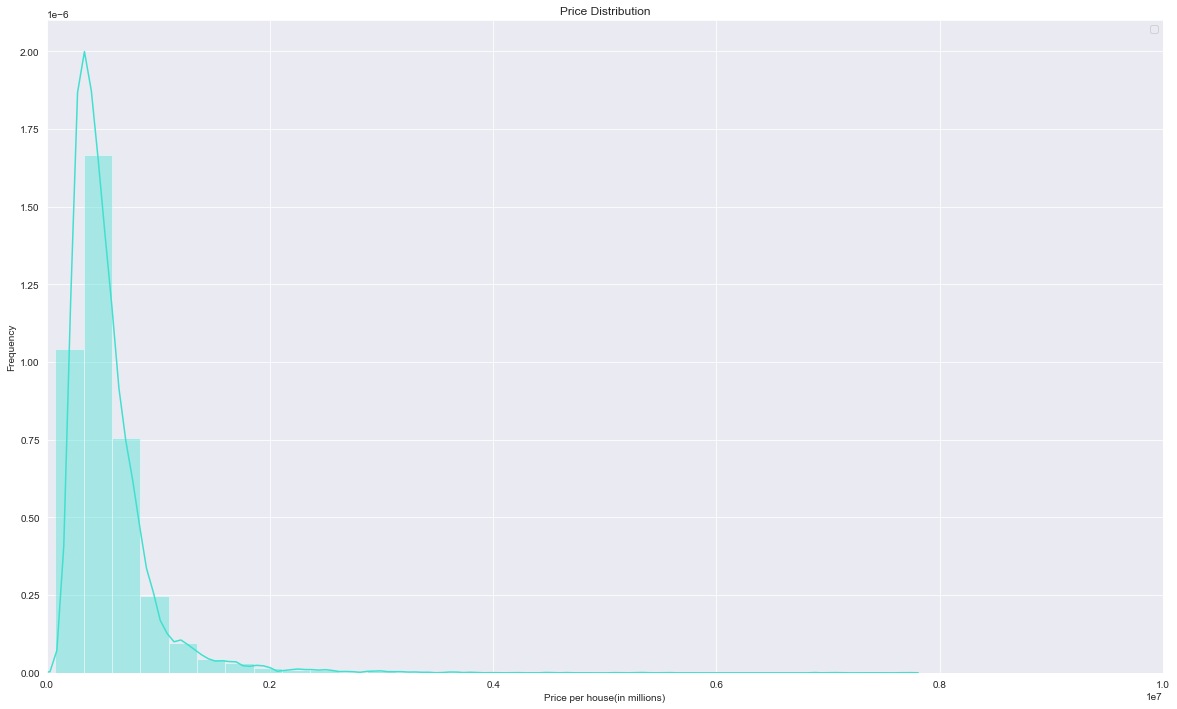

In [90]:
fig, ax = plt.subplots(figsize = (20,12))

(mu, sigma) = norm.fit(df['price'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

sns.distplot(df['price'] , bins = 30, kde = True, color = 'turquoise')
ax.set(xlim = [0,10000001], xlabel = 'Price per house(in millions)', ylabel = 'Frequency', title = 'Price Distribution')

print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

We can see from the distribution, the price is not normally distributed.ma hine 

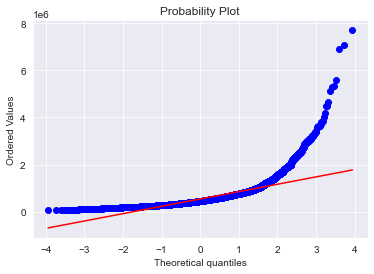

In [78]:
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

The skewness score of 4.28 is a confirmation that our prices deviate from the normal distribution by a lot. 
Looks like a normal distribution? Not quite! Looking at the kurtosis score, we see that we have a leptokurtic distribution with really heavy tails.

Lets try to take the log of price to see if our distribution becomes more normal

Skewness: 0.446582
Kurtosis: 0.767354


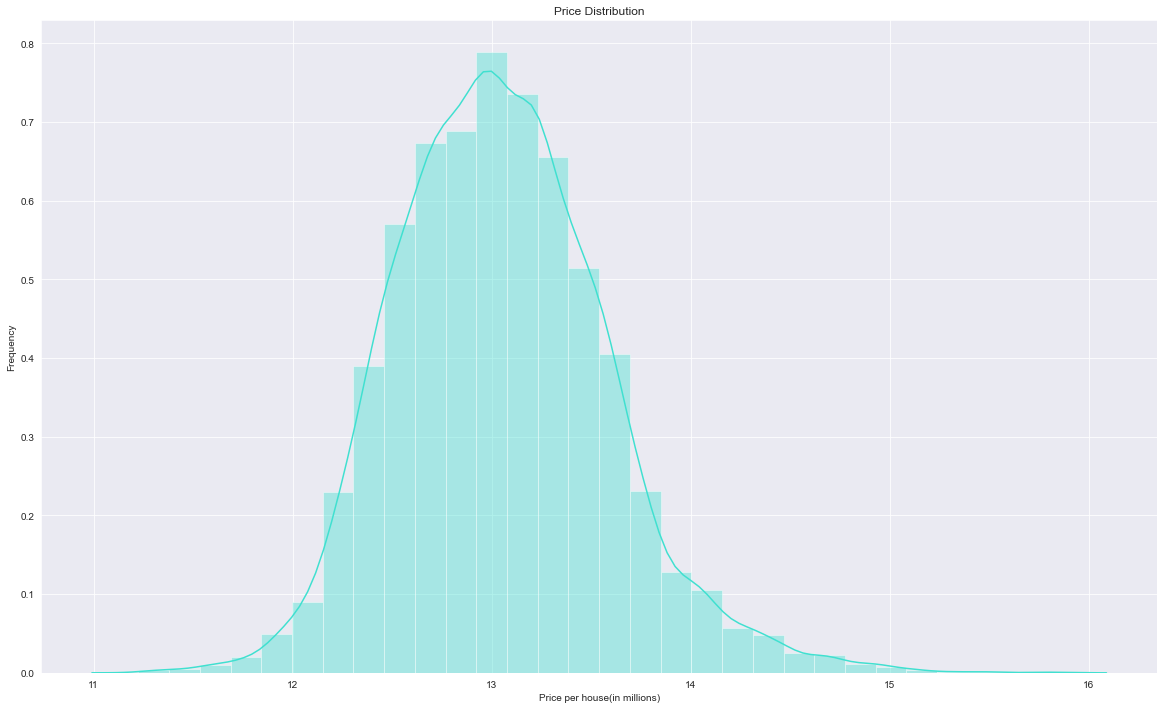

In [89]:
fig, ax = plt.subplots(figsize = (20,12))

sns.distplot(np.log(df.price),bins = 30, kde = True, color = 'turquoise')
ax.set(xlabel = 'Price per house(in millions)', ylabel = 'Frequency', title = 'Price Distribution')

print("Skewness: %f" % np.log(df.price).skew())
print("Kurtosis: %f" % np.log(df.price).kurt())

In [81]:
df.isna().sum().any()

False

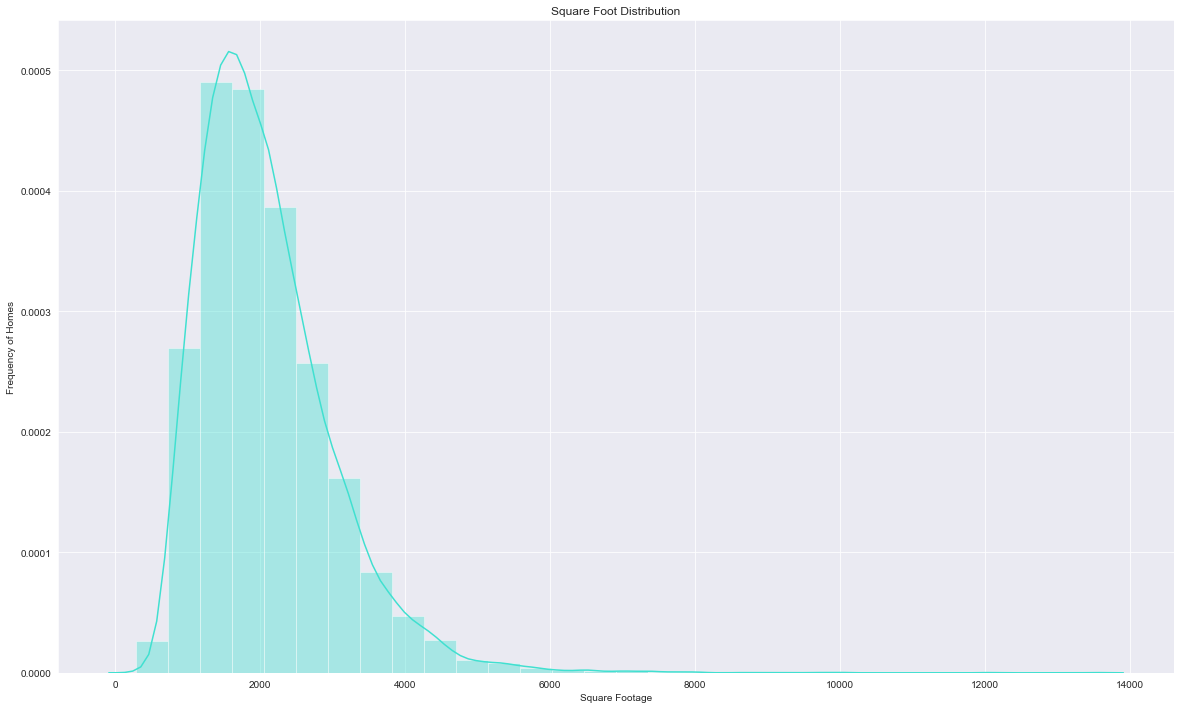

In [91]:
fig, ax = plt.subplots(figsize = (20,12));
sns.distplot(df['sqft_living'], kde=True, bins=30, color = 'turquoise');
ax.set(xlabel='Square Footage', ylabel='Frequency of Homes', title='Square Foot Distribution');

We have the smae looking distribution for square foot vs frequency, this may be a trend.

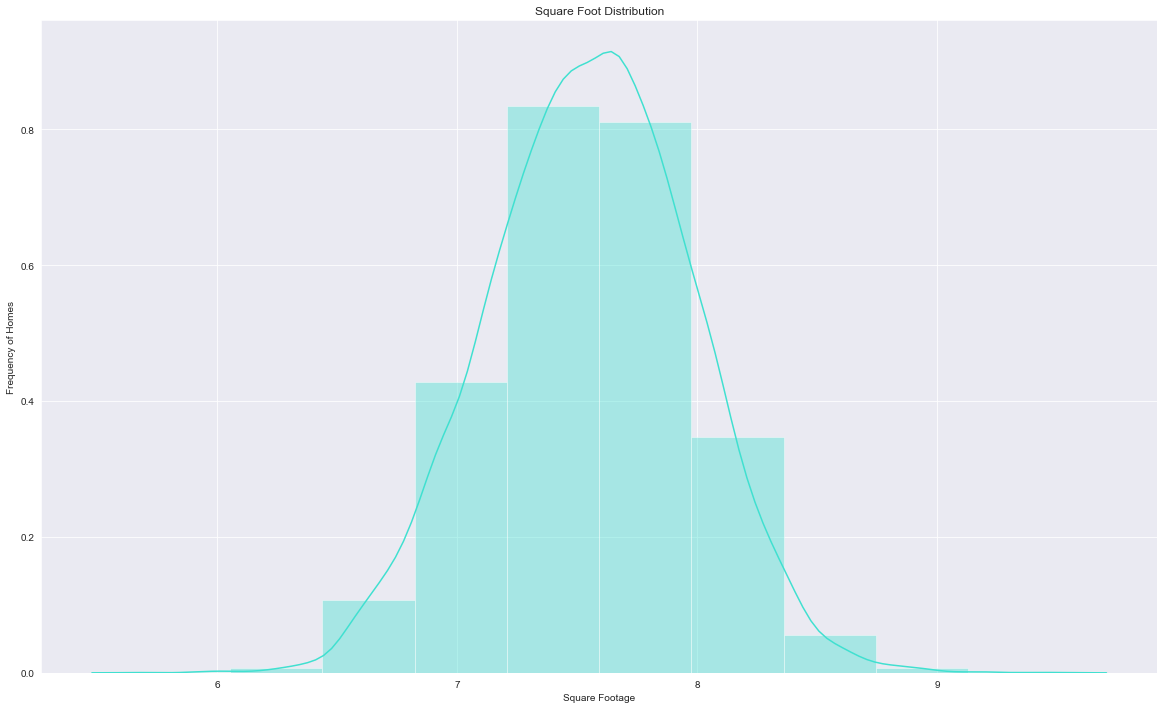

In [92]:
fig, ax = plt.subplots(figsize = (20,12));
sns.distplot(np.log(df['sqft_living']), kde=True, bins=10, color = 'turquoise');
ax.set(xlabel='Square Footage', ylabel='Frequency of Homes', title='Square Foot Distribution');

In [93]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

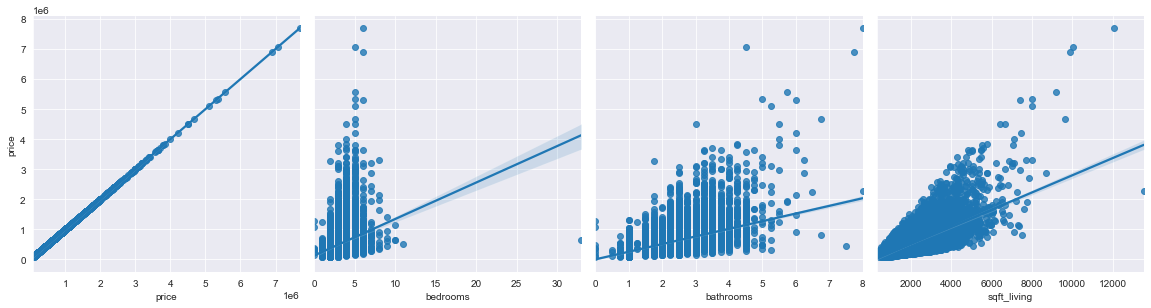

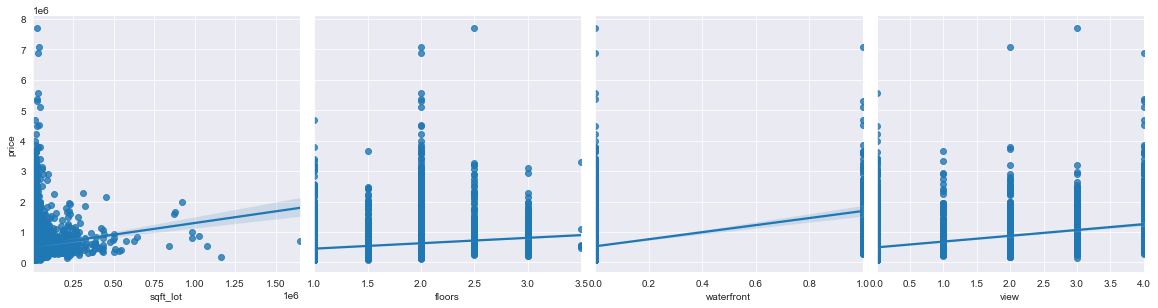

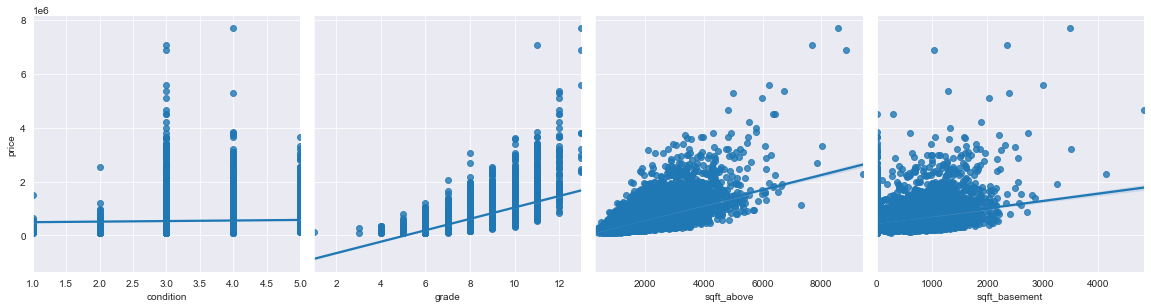

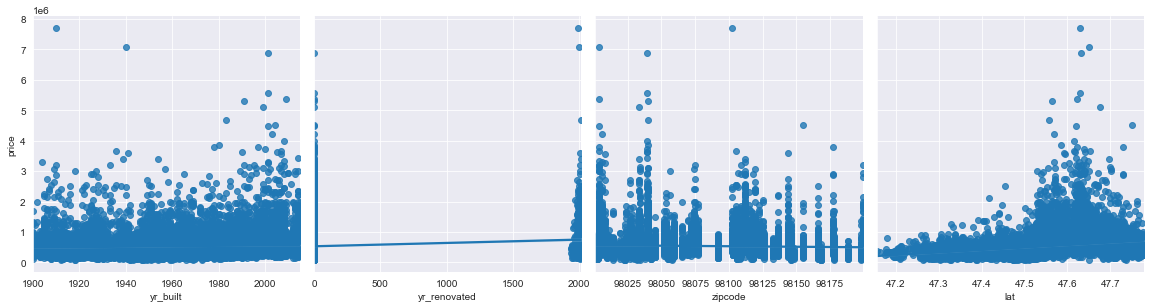

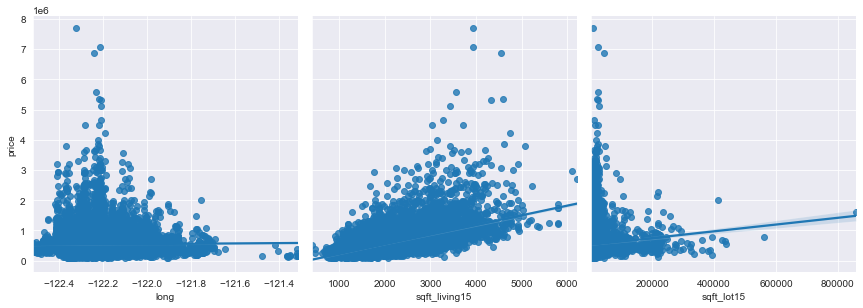

In [102]:
variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

n = 4

rows = [variables[i:i+n] for i in range(0, len(variables), n)]

for i in rows:
    graphs = sns.pairplot(data = df, y_vars = ['price'], x_vars = i, kind = 'reg', height = 4)

The only somewhat linear relationship that we can deduce is between price and sqft living

Lets take a look at bedrooms and bathrooms.

Text(1, 1, '2')

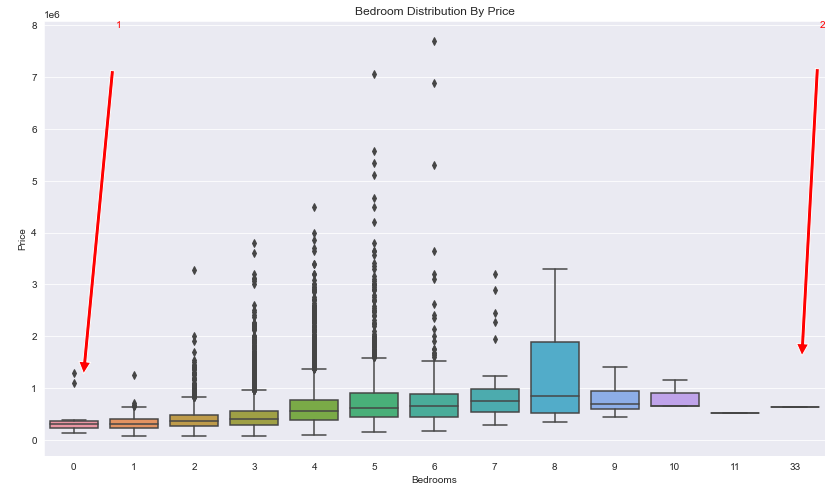

In [145]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x='bedrooms', y="price", data=df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedroom Distribution By Price');
ax.annotate('1',color = 'r', xy=(80,80), xycoords='figure points', xytext=(0.1, 1), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.1),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('2',color = 'r', xy=(800,100), xycoords='figure points', xytext=(1, 1), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.1),
            horizontalalignment='right', verticalalignment='top')

If we look at the left hand side denoted by arrow 1, we see that there are houses with 1 bedroom which is a little odd.
If we look at the right hand side denoted by arrow 2, we see that there is a house with 33 bedrooms at a selling price of less than $100,000, that is also odd.

Text(0.1, 1, '1')

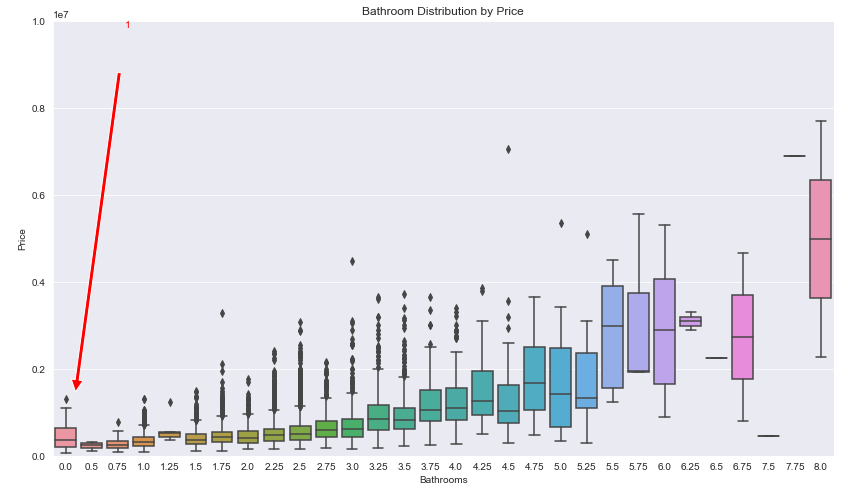

In [150]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x='bathrooms', y="price", data=df)
ax.set(xlabel='Bathrooms', ylabel='Price',title='Bathroom Distribution by Price', ylim = [0,10000000]);
ax.annotate('1',color = 'r', xy=(70,60), xycoords='figure points', xytext=(0.1, 1), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.1),
            horizontalalignment='right', verticalalignment='top')

If we look at the left hand side denoted by arrow 1, we see that there are houses that have 0 bathrooms, hence it is odd.

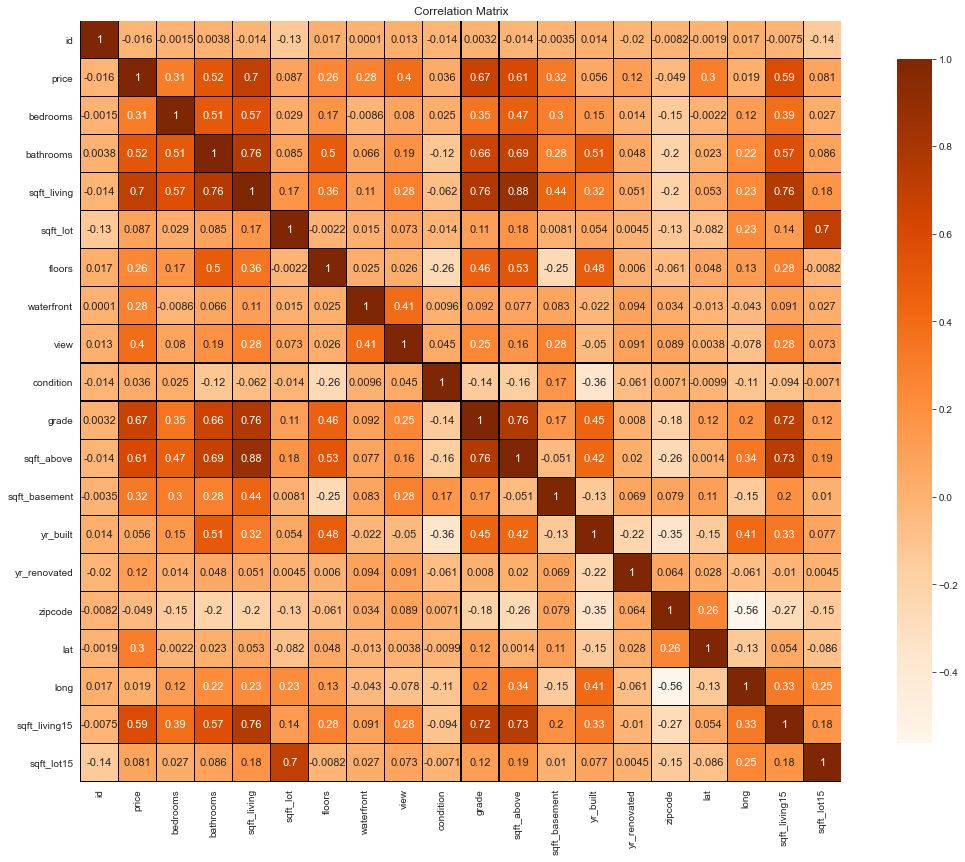

In [173]:
corr = np.zeros_like(df.corr())
corr[np.triu_indices_from(corr)] = True 

f, ax = plt.subplots(figsize=(20, 14))
plt.title('Correlation Matrix')

sns.heatmap(df.corr(),linewidths=0.1,vmax=1,square=True,cmap="Oranges",
linecolor='black',annot=True,annot_kws={"size":11},cbar_kws={"shrink": .9});
plt.show()


## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [181]:
df[df.bedrooms > 15]
#df['bedrooms'] = df['bedrooms'].replace(['33'],'3')
df.at[8597, 'bedrooms'] = 3
print(df.loc[[8597]])

              id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
8597  2402100895  20140625T000000  640000.0         3       1.75         1620      6000     1.0           0     0          5      7        1040            580      1947             0    98103  47.6878 -122.331           1330        4700


Instead of dropping the home with 33 bedrooms, I change it to 3 as I assume it was a typo.

In [183]:
df.bathrooms.value_counts()
df[df.bathrooms == 0]
#df.drop(df.loc[df['bathrooms'] == 0].index, axis=0, inplace=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3032,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
5424,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
9060,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
9286,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
12982,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


Here we are dropping the rows that have 0 bathrooms as that would not be considered a home.

In [187]:
df.skew()

id                0.248019
price             4.282599
bedrooms          0.537476
bathrooms         0.536450
sqft_living       1.541422
sqft_lot         13.590861
floors            0.623358
waterfront       11.059798
view              3.370325
condition         1.037465
grade             0.775600
sqft_above        1.469528
sqft_basement     1.593867
yr_built         -0.461850
yr_renovated      4.568066
zipcode           0.407244
lat              -0.484994
long              0.892881
sqft_living15     1.114917
sqft_lot15        8.766265
dtype: float64

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [192]:
#We want to create a new column that shows us how old a house is
df['house_years_old'] = 2020 - df['yr_built']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_years_old
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,34
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,43
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,23
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,30
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,62
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,72
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,67
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,49


In [194]:
def dates(df):
    df['year_sold'] = df.date.apply(lambda x: int(x[0:4]))
    df['month_sold'] = df.date.apply(lambda x:int(x[4:6]))
    df.date = df.date.apply(lambda x: int(x[0:8]))
    df.date = pd.to_datetime(df.date, format = "%Y%m%d")
    return df
df = dates(df)

In [195]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_years_old,year_sold,month_sold
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,34,2014,10
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,43,2014,8
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,23,2014,8
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,30,2015,3
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,16,2014,7


### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [1]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/